# Principal Component analysis for data reduction PCA
One of the most important applications of PCA is for speeding up machine learning algorithms. 

Dataset for classification task:
https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star/version/1#pulsar_stars.csv

The data set contains information we’ll use to predict whether or not is a pulsar star.

“Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .”

This data set contains 17.898 samples and 8 attributes, or dimensions, that are shown below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.


Extraction from cvs data file: 
 Mean of the integrated profile	 Standard deviation of the integrated profile	 Excess kurtosis of the integrated profile	 Skewness of the integrated profile	 Mean of the DM-SNR curve	 Standard deviation of the DM-SNR curve	 Excess kurtosis of the DM-SNR curve	 Skewness of the DM-SNR curve	target_class
140.5625	55.68378214	-0.234571412	-0.699648398	3.199832776	19.11042633	7.975531794	74.24222492	0
102.5078125	58.88243001	0.465318154	-0.515087909	1.677257525	14.86014572	10.57648674	127.3935796	0
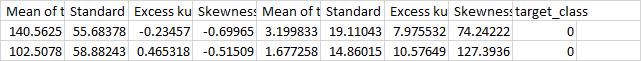


## The Principal Component Analysis with Sklearn
The first thing we should do is import the PCA class from the scikit-learn library and the NumPy library:

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


Now we will load the csv data using numpy:

In [2]:
filepath = 'pulsar_stars.csv' #your path here
data = np.genfromtxt(filepath, delimiter=',', dtype='float64')

In [78]:
import pandas as pd
data2=pd.read_csv('pulsar_stars.csv')
data2.head(3)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0


In [17]:
#more checks on data
print ("data info  :",data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
data info  : None


In [18]:
print (data2.isnull().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


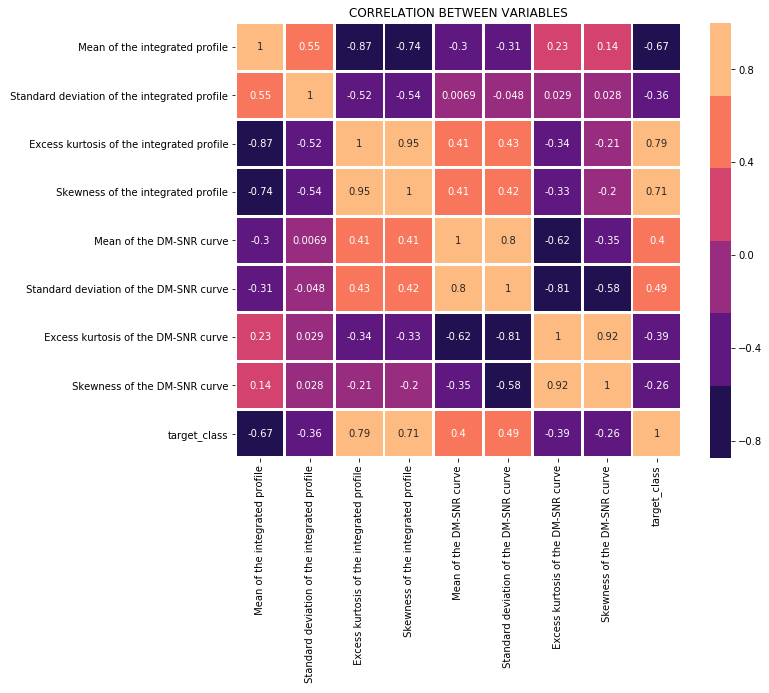

In [22]:
#correlation between variables
from matplotlib import pyplot as plt
import seaborn as sns
correlation = data2.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()


In [32]:
data2.head(2)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0


***************************************
DISTIBUTION OF VARIABLES IN DATA SET
***************************************


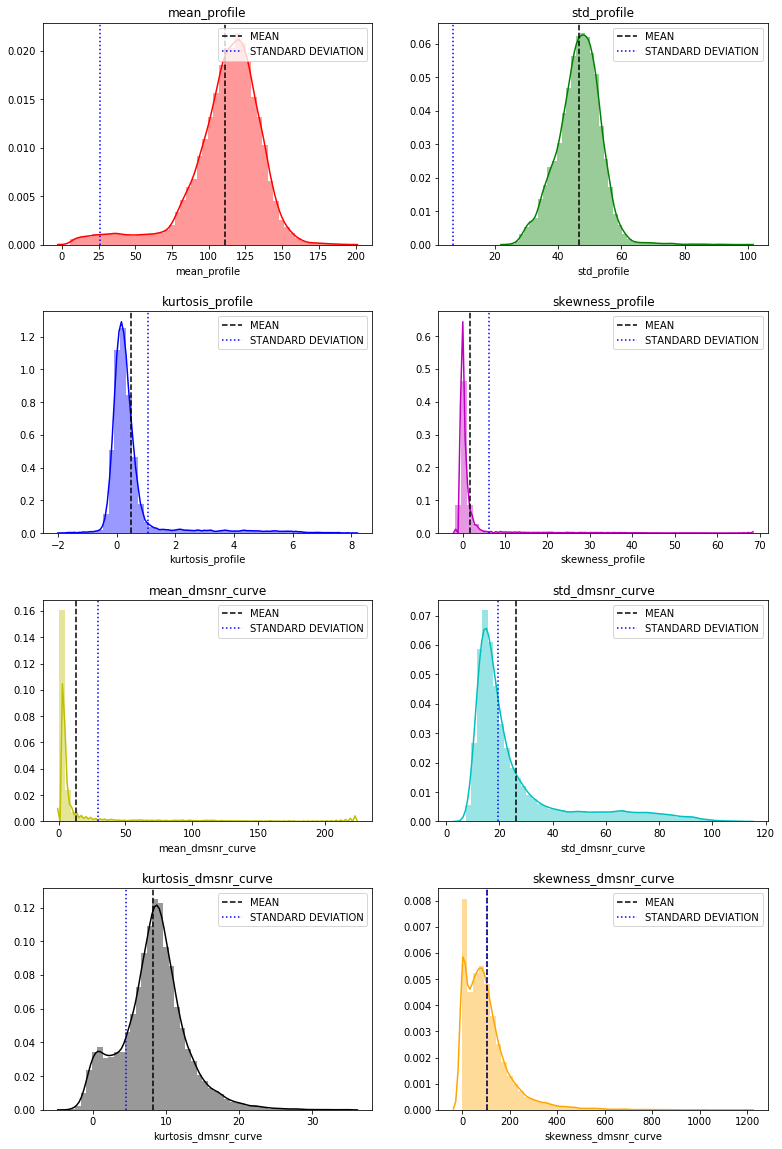

In [35]:
#distributuon of variables in data
#rename column to shorter versions
data2.columns=['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
           'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
           'skewness_dmsnr_curve', 'target_class']
columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
           'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
           'skewness_dmsnr_curve']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(13,20))
from itertools import zip_longest 
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(data2[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(data2[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(data2[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    
print ("***************************************")
print ("DISTIBUTION OF VARIABLES IN DATA SET")
print ("***************************************")

C:\Users\dave_\Anaconda3_2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\dave_\Anaconda3_2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\dave_\Anaconda3_2\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


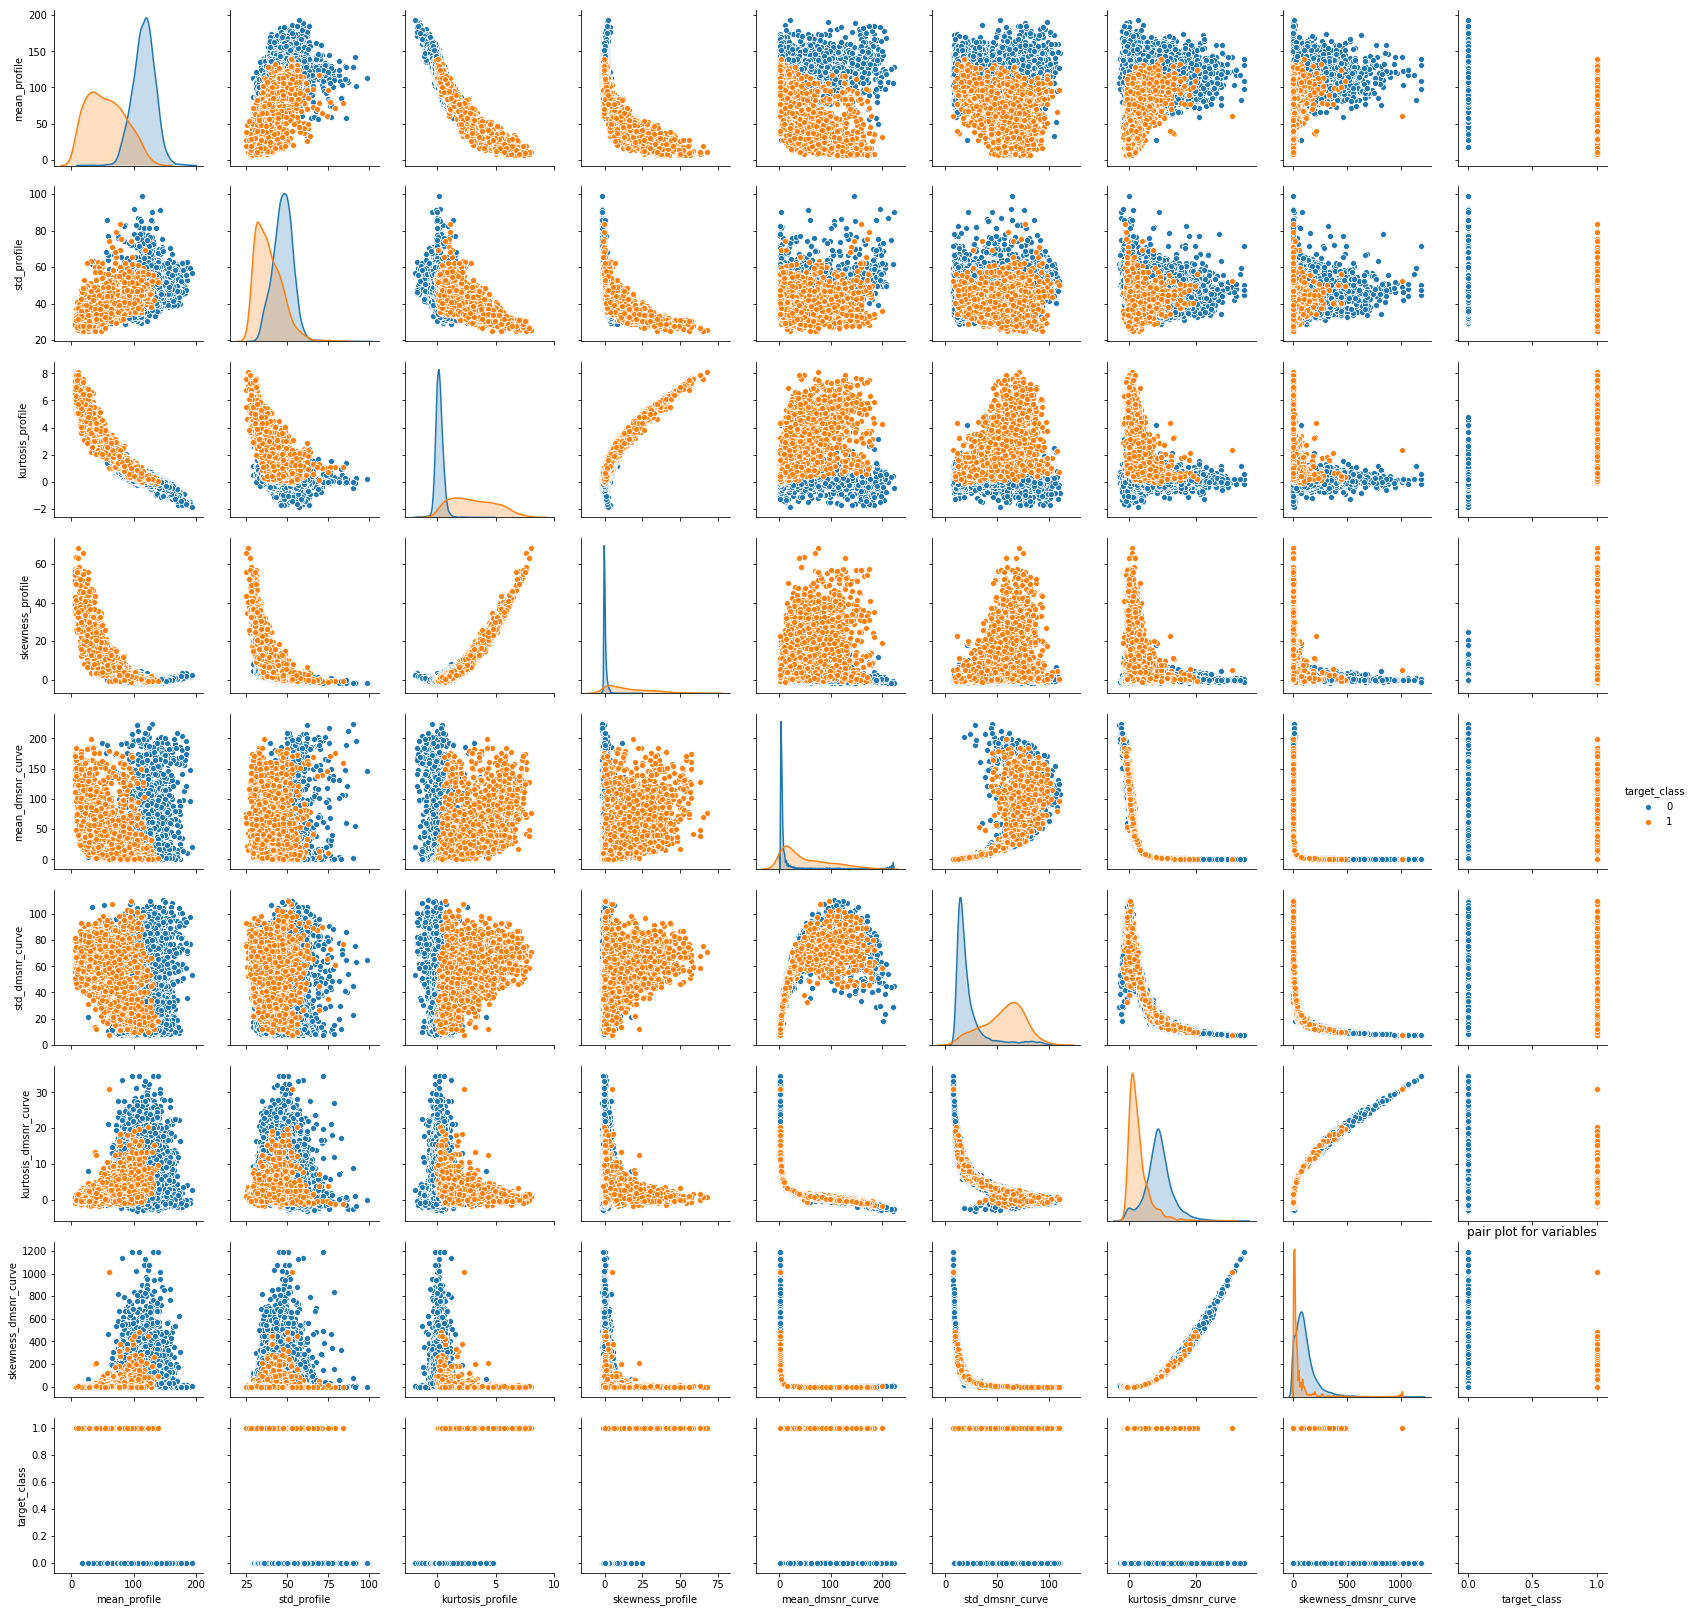

In [36]:
#pair plot between all variables
sns.pairplot(data2,hue="target_class")
plt.title("pair plot for variables")
plt.show()

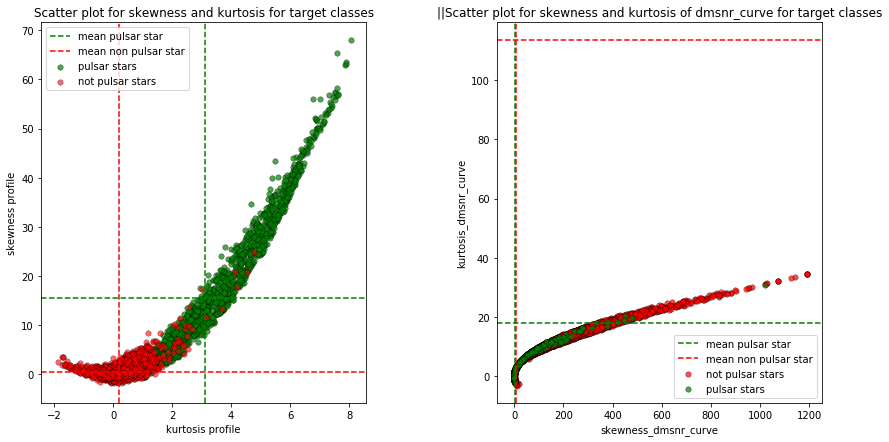

In [38]:
#Scatter plot between variable for target classes
data=pd.read_csv('pulsar_stars.csv')
data.columns=['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
           'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
           'skewness_dmsnr_curve', 'target_class']
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.scatter(x = "kurtosis_profile",y = "skewness_profile",
            data=data[data["target_class"] == 1],alpha=.7,
            label="pulsar stars",s=30,color = "g",linewidths=.4,edgecolors="black")
plt.scatter(x = "kurtosis_profile",y = "skewness_profile",
            data=data[data["target_class"] == 0],alpha=.6,
            label="not pulsar stars",s=30,color ="r",linewidths=.4,edgecolors="black")
plt.axvline(data[data["target_class"] == 1]["kurtosis_profile"].mean(),
            color = "g",linestyle="dashed",label="mean pulsar star")
plt.axvline(data[data["target_class"] == 0]["kurtosis_profile"].mean(),
            color = "r",linestyle="dashed",label ="mean non pulsar star")
plt.axhline(data[data["target_class"] == 1]["skewness_profile"].mean(),
            color = "g",linestyle="dashed")
plt.axhline(data[data["target_class"] == 0]["skewness_profile"].mean(),
            color = "r",linestyle="dashed")
plt.legend(loc ="best")
plt.xlabel("kurtosis profile")
plt.ylabel("skewness profile")
plt.title("Scatter plot for skewness and kurtosis for target classes")
plt.subplot(122)
plt.scatter(x = "skewness_dmsnr_curve",y = 'kurtosis_dmsnr_curve',
            data=data[data["target_class"] == 0],alpha=.7,
            label="not pulsar stars",s=30,color ="r",linewidths=.4,edgecolors="black")
plt.scatter(x = "skewness_dmsnr_curve",y = 'kurtosis_dmsnr_curve',
            data=data[data["target_class"] == 1],alpha=.7,
            label="pulsar stars",s=30,color = "g",linewidths=.4,edgecolors="black")
plt.axvline(data[data["target_class"] == 1]["kurtosis_dmsnr_curve"].mean(),
            color = "g",linestyle="dashed",label ="mean pulsar star")
plt.axvline(data[data["target_class"] == 0]["kurtosis_dmsnr_curve"].mean(),
            color = "r",linestyle="dashed",label ="mean non pulsar star")
plt.axhline(data[data["target_class"] == 1]["skewness_dmsnr_curve"].mean(),
            color = "g",linestyle="dashed")
plt.axhline(data[data["target_class"] == 0]["skewness_dmsnr_curve"].mean(),
            color = "r",linestyle="dashed")
plt.legend(loc ="best")
plt.xlabel("skewness_dmsnr_curve")
plt.ylabel('kurtosis_dmsnr_curve')
plt.title("||Scatter plot for skewness and kurtosis of dmsnr_curve for target classes")
plt.subplots_adjust(wspace =.4)


C:\Users\dave_\Anaconda3_2\lib\site-packages\seaborn\categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)
C:\Users\dave_\Anaconda3_2\lib\site-packages\seaborn\categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)
C:\Users\dave_\Anaconda3_2\lib\site-packages\seaborn\categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)
C:\Users\dave_\Anaconda3_2\lib\site-packages\seaborn\categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)
C:\Users\dave_\Anaconda3

****************************************************
BOXPLOT FOR VARIABLES IN DATA SET WITH TARGET CLASS
****************************************************


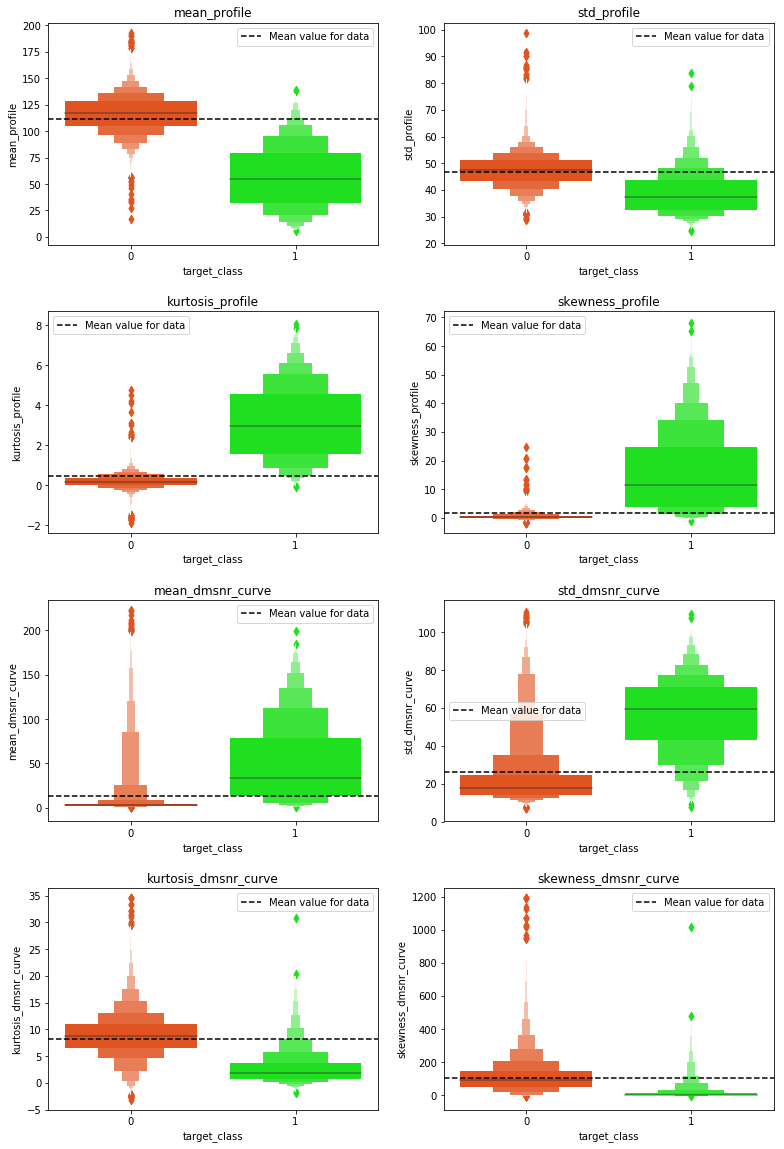

In [39]:
#box plots 
columns = [x for x in data.columns if x not in ["target_class"]]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    sns.lvplot(x=data["target_class"],y=data[i],palette=["orangered","lime"])
    plt.title(i)
    plt.subplots_adjust(hspace=.3)
    plt.axhline(data[i].mean(),linestyle = "dashed",color ="k",label ="Mean value for data")
    plt.legend(loc="best")
    
print ("****************************************************")
print ("BOXPLOT FOR VARIABLES IN DATA SET WITH TARGET CLASS")
print ("****************************************************")

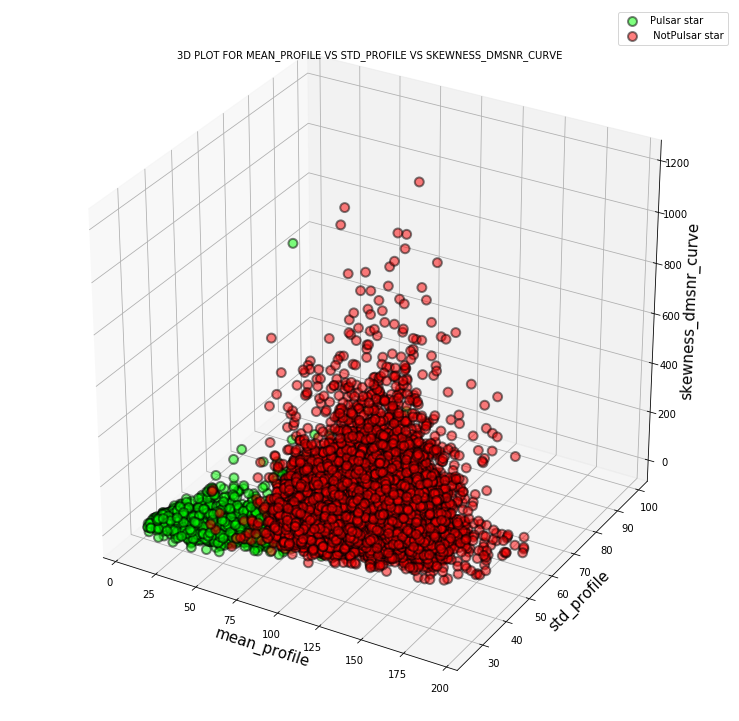

In [40]:
#3D PLOT FOR MEAN_PROFILE VS STD_PROFILE VS SKEWNESS_DMSNR_CURVE
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13,13))
ax  = fig.add_subplot(111,projection = "3d")

ax.scatter(data[data["target_class"] == 1][["mean_profile"]],data[data["target_class"] == 1][["std_profile"]],data[data["target_class"] == 1][["skewness_dmsnr_curve"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="lime",label="Pulsar star")
ax.scatter(data[data["target_class"] == 0][["mean_profile"]],data[data["target_class"] == 0][["std_profile"]],data[data["target_class"] == 0][["skewness_dmsnr_curve"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="r",label=" NotPulsar star")

ax.set_xlabel("mean_profile",fontsize=15)
ax.set_ylabel("std_profile",fontsize=15)
ax.set_zlabel("skewness_dmsnr_curve",fontsize=15)
plt.legend(loc="best")
fig.set_facecolor("w")
plt.title("3D PLOT FOR MEAN_PROFILE VS STD_PROFILE VS SKEWNESS_DMSNR_CURVE",fontsize=10)
plt.show()

C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'scale'
  s)


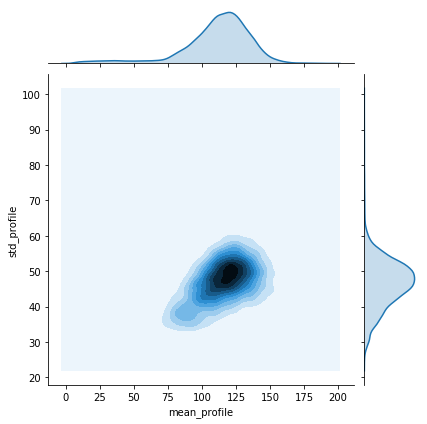

In [41]:
#density plot between mean_profile and std_profile
sns.jointplot(data["mean_profile"],data["std_profile"],kind="kde",scale=10)
plt.show()

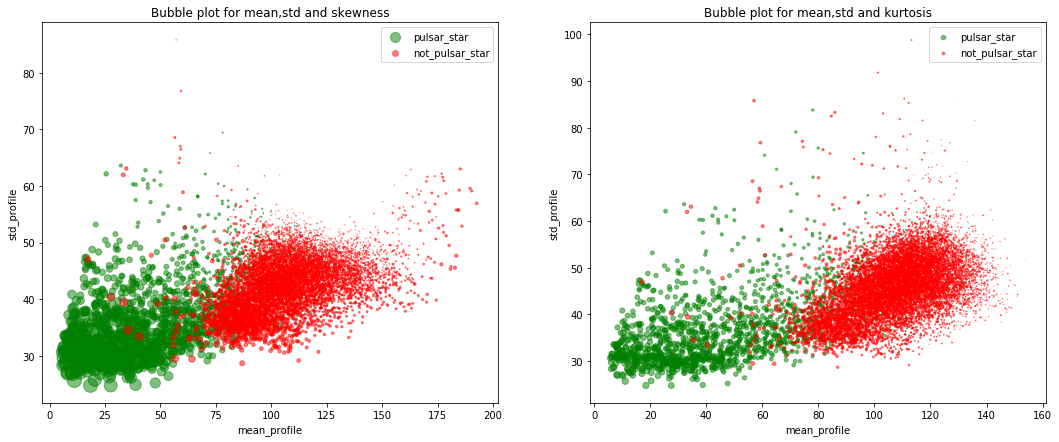

In [50]:
#split data to 2 data frames, based on target class
st=data.loc[data['target_class'] == 1]
nst=data.loc[data['target_class'] == 0]

#Bubble plot between mean,std for skewness and kurtosis
plt.figure(figsize=(18,7))
plt.subplot(121)
plt.scatter(st["mean_profile"],st["std_profile"],alpha=.5,
            s=st["skewness_profile"]*3,linewidths=1,color="g",label="pulsar_star")
plt.scatter(nst["mean_profile"],nst["std_profile"],alpha=.5,
            s=nst["skewness_profile"]*3,linewidths=1,color="r",label="not_pulsar_star")
plt.legend(loc="best")
plt.xlabel("mean_profile")
plt.ylabel("std_profile")
plt.title("Bubble plot for mean,std and skewness")


plt.subplot(122)
plt.scatter(st["mean_profile"],st["std_profile"],alpha=.5,
            s=st["kurtosis_profile"]*5,linewidths=1,color="g",label="pulsar_star")
plt.scatter(nst["mean_profile"],nst["std_profile"],alpha=.5,
            s=nst["kurtosis_profile"]*5,linewidths=1,color="r",label="not_pulsar_star")
plt.legend(loc="best")
plt.xlabel("mean_profile")
plt.ylabel("std_profile")
plt.title("Bubble plot for mean,std and kurtosis")
plt.show()

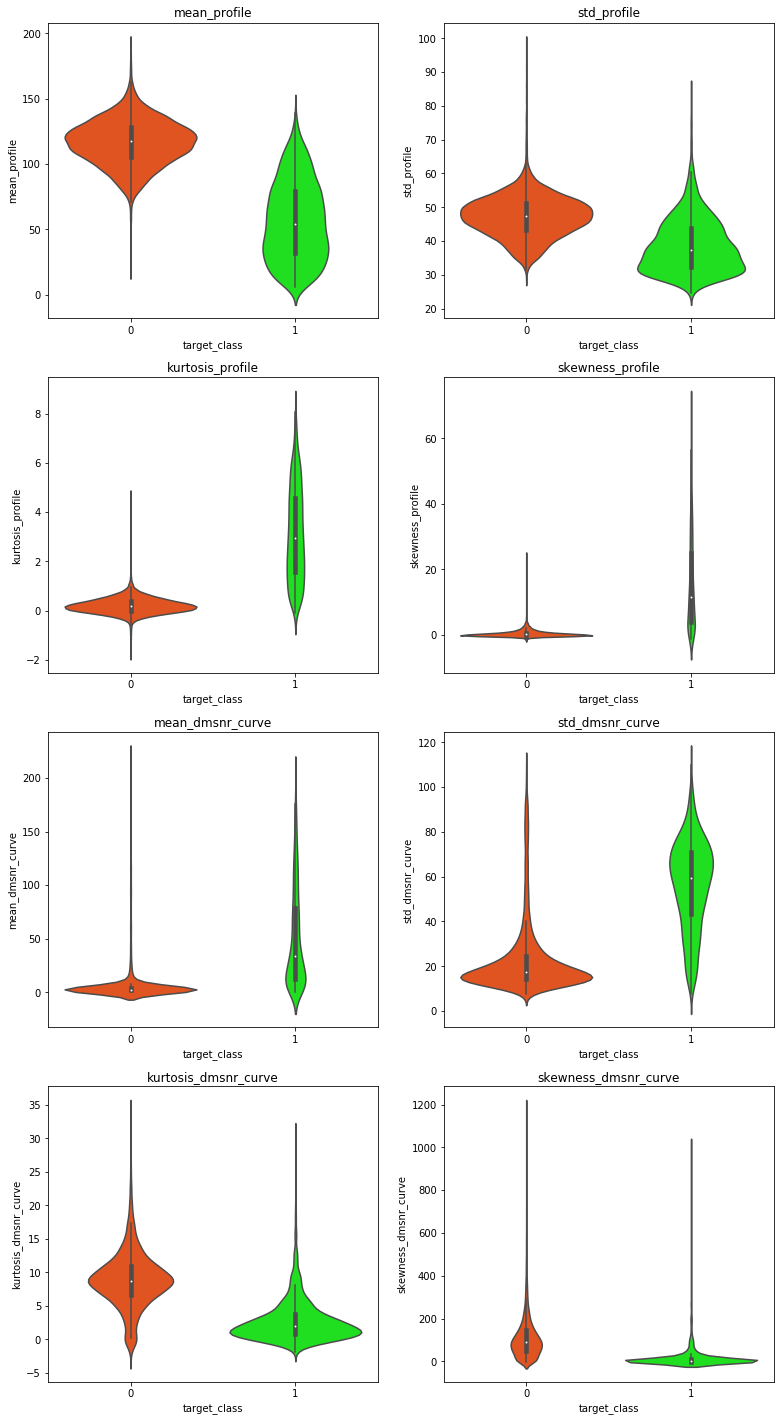

In [51]:
#visualizing the distribution of a variables for target class
columns = [x for x in data.columns if x not in ["target_class"]]
length  = len(columns)

plt.figure(figsize=(13,25))

for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sns.violinplot(x=data["target_class"],y=data[i],
                   palette=["Orangered","lime"],alpha=.5)
    plt.title(i)

The next step is to rescale our data to a range between 0 and 1, with MinMaxScaler from sklearn. Data sets can contains random attributes with different units of measurement, one attribute can be price, another can be percentage, another can be a binary value. To perform a reasonable covariance analysis we need to normalize this data, putting all attributes in the same unit of measurement (the range between 0 and 1), it will improve the maximization of the variance for each component that our PCA needs to perform its matrix operations in the best way.

(we selected samples from 1 to the end (data[1:, 0:8]) because the first line of the data set contains the labels of each column)

(we selected columns from 0 to 8 (data[1:, 0:8]) because the last column (9) represents the class labels for each prediction)


In [3]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data[1:, 0:8])

Now that we have a rescaled data set of 17.898 samples and 8 attributes, we can calculate the explained variance for each attribute by using scikit-learn, and plot the result:

To access values and vectors use:

print(pca.components_)
Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.


print(pca.explained_variance_)
The amount of variance explained by each of the selected components.

Equal to n_components largest eigenvalues of the covariance matrix of X.


pca.explained_variance_ratio_ : array, shape (n_components,)
Percentage of variance explained by each of the selected components.

If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.




## REDO from HERE, work out number of components on PCA after train/test split
RUN on a whole dataset

THAN Train test split all dataset

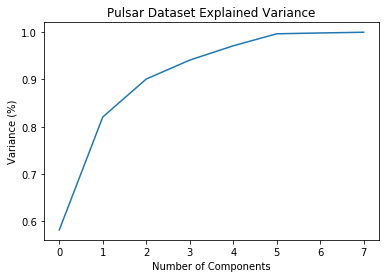

In [6]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance

#import pyplot as plt library
from matplotlib import pyplot as plt

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

This plot tells us that selecting 5 components we can preserve something around 98.8% or 99% of the total variance of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.

With this information in our hands, we can implement the PCA for 5 best components by using this snippet of code:

In [11]:
pca = PCA(n_components=5)
dataset = pca.fit_transform(data_rescaled)

The dataset variable will store our new data set, now with 17.898 samples and 5 components, or dimensions, or attributes.

You can use the dataset as your X, and the data[:, 8:] as your Y, to split in train and test data, and to fit in your models, reducing the overfitting and the training time.


## Train Test split and proportion on star data


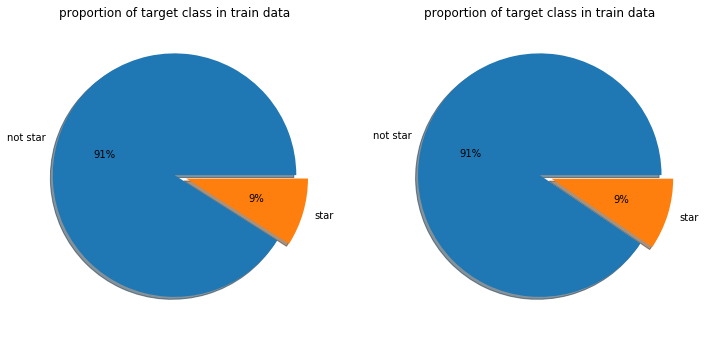

In [58]:
from sklearn.model_selection import train_test_split


#for visual purposes
train , test = train_test_split(data,test_size = .3,random_state = 123)

#for production run
#train_X,train_Y,test_X,test_Y
target = data['target_class']
features = data.drop('target_class', axis = 1)

train_X, test_X, train_Y, test_Y = train_test_split(features, target, test_size=0.3, random_state = 123)


plt.figure(figsize=(12,6))
plt.subplot(121)
train["target_class"].value_counts().plot.pie(labels = ["not star","star"],
                                              autopct = "%1.0f%%",
                                              shadow = True,explode=[0,.1])
plt.title("proportion of target class in train data")
plt.ylabel("")
plt.subplot(122)
test["target_class"].value_counts().plot.pie(labels = ["not star","star"],
                                             autopct = "%1.0f%%",
                                             shadow = True,explode=[0,.1])
plt.title("proportion of target class in train data")
plt.ylabel("")
plt.show()

In [86]:
##model function
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

import time
def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y,of_type):

    start_time = time.clock()

    
    print ("*****************************************************************************************")
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    print (algorithm)
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    print (time.clock() - start_time, "seconds")
    print ("\nclassification report :\n",(classification_report(dtest_y,predictions)))
        
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_,dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
    
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
            
    elif of_type == "none" :
        return (algorithm)
    

## Random Forest Classifier


C:\Users\dave_\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

accuracy_score : 0.9769087523277468
0.2642326889999822 seconds

classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4860
           1       0.93      0.82      0.87       510

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.95      0.91      0.93      5370
weighted avg       

C:\Users\dave_\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


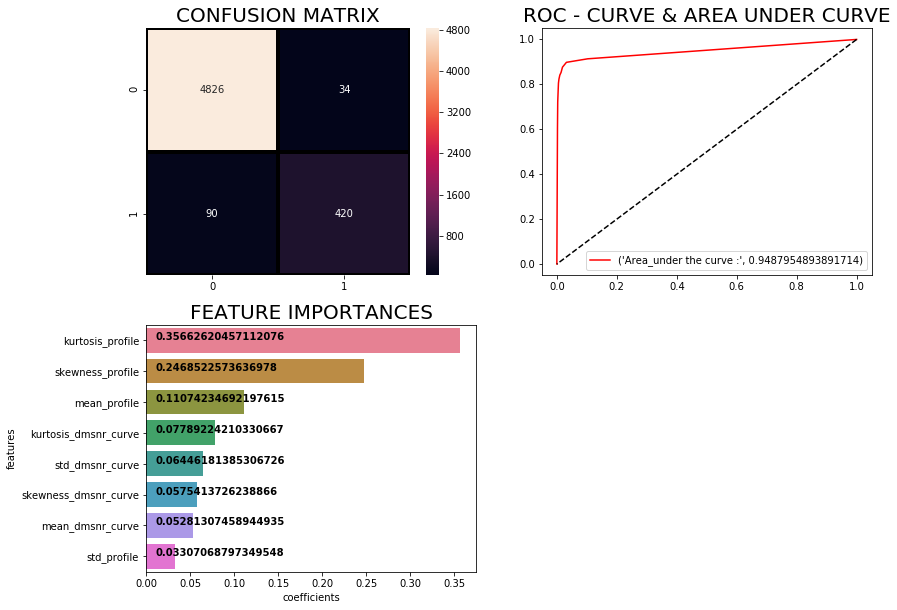

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
model(rf,train_X,train_Y,test_X,test_Y,"feat")

## Logistic Regression

C:\Users\dave_\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

accuracy_score : 0.9763500931098696
0.08904436400007398 seconds

classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4860
           1       0.93      0.82      0.87       510

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.95      0.90      0.93      5370
weighted avg       0.98      0.98      0.98      5370



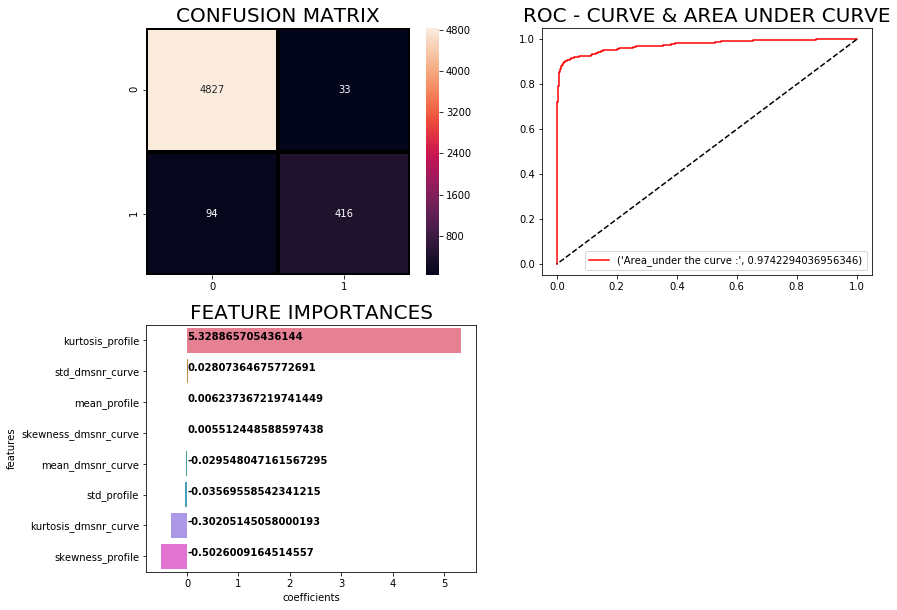

In [93]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
model(log,train_X,train_Y,test_X,test_Y,"coef")

## Decision Tree Classifier


C:\Users\dave_\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Users\dave_\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

accuracy_score : 0.9646182495344506
0.15966879600091488 seconds

classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4860
           1       0.80      0.83      0.82       510

   micro avg       0.96      0.96      0.96      5370
   macro avg       0.89      0.90      0.90      5370
weighted avg       0.97      0.96      0.96      5370



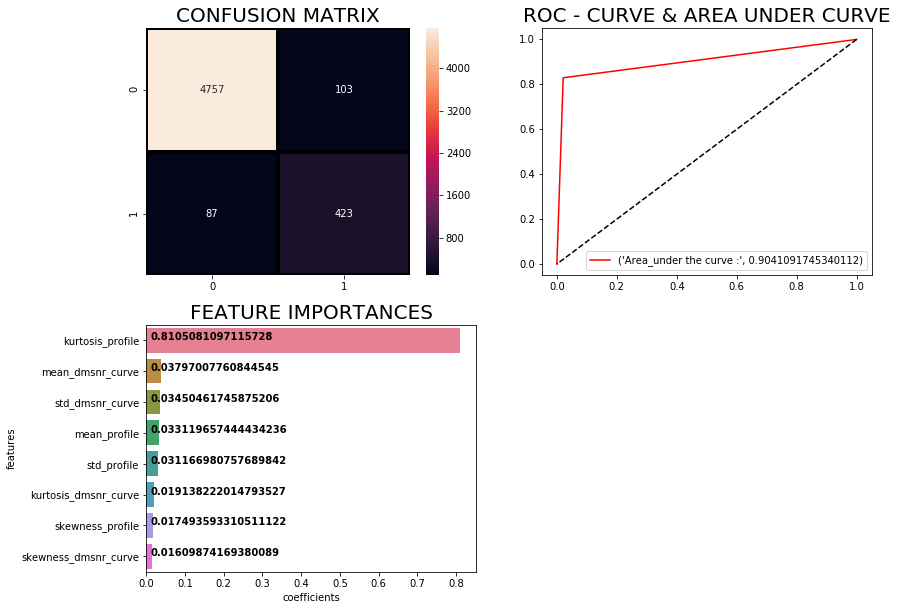

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model(dt,train_X,train_Y,test_X,test_Y,"feat")

## Extra tree classifier

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

accuracy_score : 0.9592178770949721

classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4860
           1       0.78      0.80      0.79       510

   micro avg       0.96      0.96      0.96      5370
   macro avg       0.88      0.89      0.88      5370
weighted avg       0.96      0.96      0.96      5370



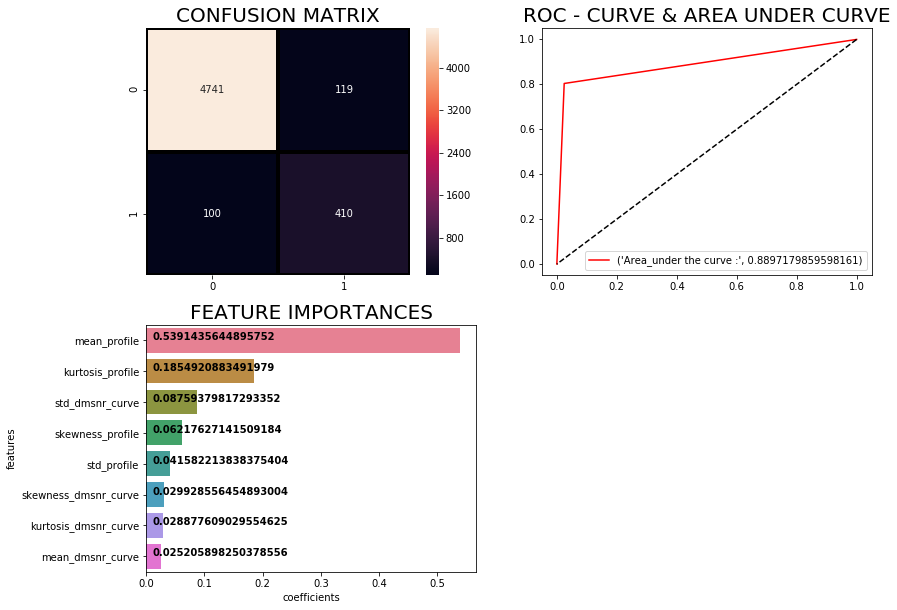

In [63]:
from sklearn.tree import ExtraTreeClassifier
etc = ExtraTreeClassifier()
model(etc,train_X,train_Y,test_X,test_Y,"feat")

## Gradient Boosting Classifier


C:\Users\dave_\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

accuracy_score : 0.9750465549348231
1.0370170269998198 seconds

classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4860
           1       0.89      0.85      0.87       510

   mic

C:\Users\dave_\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


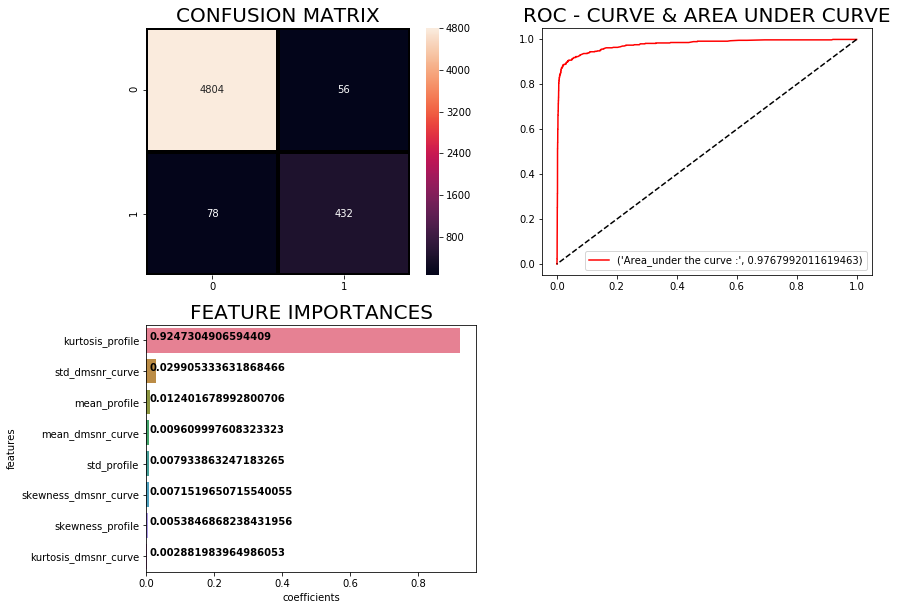

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model(gbc,train_X,train_Y,test_X,test_Y,"feat")

## Gaussian Naive Bayes

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
GaussianNB(priors=None, var_smoothing=1e-09)

accuracy_score : 0.9379888268156424

classification report :
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      4860
           1       0.63      0.83      0.72       510

   micro avg       0.94      0.94      0.94      5370
   macro avg       0.81      0.89      0.84      5370
weighted avg       0.95      0.94      0.94      5370



GaussianNB(priors=None, var_smoothing=1e-09)

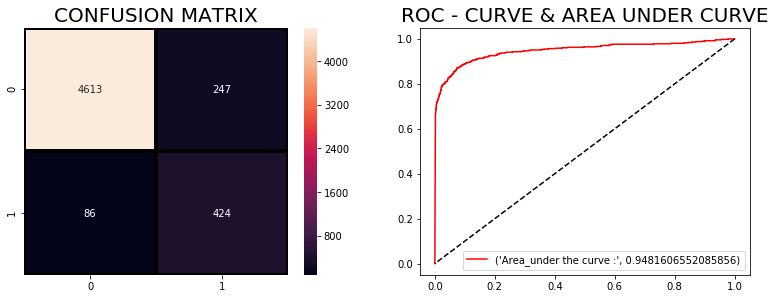

In [65]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model(nb,train_X,train_Y,test_X,test_Y,"none")

## K-Nearest Neighboor classifier

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

accuracy_score : 0.9694599627560522

classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      4860
           1       0.89      0.78      0.83       510

   micro avg       0.97      0.97      0.97      5370
   macro avg       0.93      0.88      0.91      5370
weighted avg       0.97      0.97      0.97      5370



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

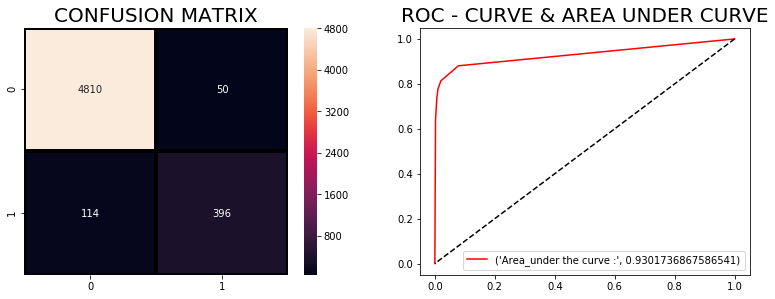

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model(knn,train_X,train_Y,test_X,test_Y,"none")

## Ada Boost Classifier


*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

accuracy_score : 0.9763500931098696

classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4860
           1       0.92      0.82      0.87       510

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.95      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



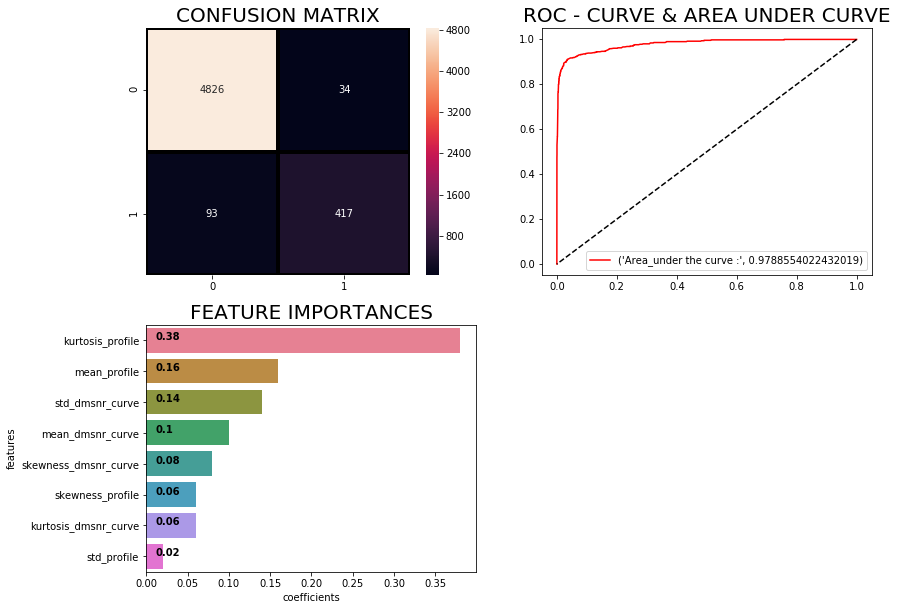

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
model(ada,train_X,train_Y,test_X,test_Y,"feat")

## Random Forest on data after PCA


In [70]:
#dataset.head(3)
d_pca = pd.DataFrame(data=dataset[1:,1:],    # values
              index=dataset[1:,0],    # 1st column as index
              columns=dataset[0,1:])  # 1st row as the column names
d_pca.head(3)

,-0.16093835274580323,-0.02666217679747804,0.058043259668579414,0.02261205546425302
-0.127223,0.016528,0.028527,0.174380,-0.042755
-0.019440,0.063518,-0.080879,-0.050851,0.018897
-0.102257,-0.163929,-0.043828,0.086351,0.013648


In [79]:
target_pca = data2['target_class']
target_pca.head(3)

0    0
1    0
2    0
Name: target_class, dtype: int64

In [81]:
target_pca = data['target_class']
trainpca_X, testpca_X, trainpca_Y, testpca_Y = train_test_split(dataset, target_pca, test_size=0.3, random_state = 123)


## Random Forest Classifier on data after PCA

check if result on data after PCA is the same. RF on data without PCA is accuracy_score : 0.976536312849162
RUn time: 0.26491025400173385 seconds

C:\Users\dave_\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

accuracy_score : 0.9731843575418995
0.2823307670005306 seconds

classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4860
           1       0.94      0.77      0.84       510

   micro avg       0.97      0.97      0.97      5370
   macro avg       0.96      0.88      0.91      5370
weighted avg       

C:\Users\dave_\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

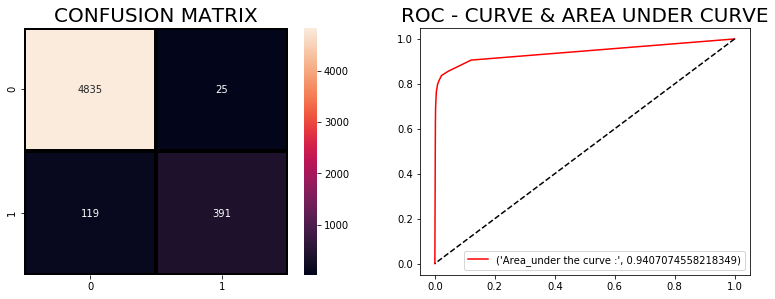

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
model(rf,trainpca_X,trainpca_Y,testpca_X,testpca_Y,"feat")


Comparing results PCA or Without PCA

RF on Data without PCA
accuracy_score : 0.9780260707635009
0.26491025400173385 seconds

RF of Data After PCA
accuracy_score : 0.9731843575418995
0.2823307670005306 seconds


So, no really any difference timewise or quality wise to go from 9 features to 5.

Need a bigger dataset to test how PCA timing would be affected.
